# Fraud Detection Using SMOTE and Logistic Regression

In this Jupyter notebook we will be exploring the Credit Card Fraud dataset found in https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud [1] with the overall goal of creating a machine learning model which will be able to classify a transaction as either fraudulent or purchased through authorized means.  Note that the size of this file is too large to upload to this github repository, however, the dataset can be found via the link provided.

From [1] we can see class 0 denotes legitimate transactions and class 1 denotes the fraudulent transactions.  Exploring further in our dataset we can see that we have 492 fraudulent samples out of 284,807 total transactions which shows that this dataset is highly imbalanced (fraud accounts for 0.172% of all the transactions).  Due to the imbalanced nature of the dataset, we will use Synthetic Minority Oversampling TEchnique (SMOTE) to generate synthetic data.

Let us perform some EDA on the dataset to become more familiar with it.

# Exploratory Data Analysis

In the below section we will explore the dataset mentioned above so that we can become more familiar with it.  The dataset was downloaded from [1] and saved as a csv in the directory of this Jupyter notebook - we will first import the data and input it into a pandas dataframe.

In [72]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Read data from csv into pandas dataframe and show top five rows
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [73]:
# Show number of rows and columns of dataset
df.shape

(284807, 31)

In [74]:
# Get statistics from our dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [75]:
# Get a count of the number of legitimate/fraudulent transactions to show imbalance
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Lets plot the above with a histogram to visualize the imbalance.

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

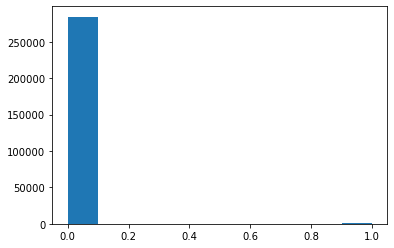

In [76]:
plt.hist(df['Class'])

Here we can see that we have significantly less fraudulent transactions than we do legitimate transactions.  To remedy this, we will use Synthetic Minority Oversampling TEchnique (SMOTE) to generate more fraudulent transactions to use for our machine learning model.  Before doing this, lets first split our data into more manageable variables.

In [77]:
y = df['Class']
X = df.drop(['Class'], axis=1)

# Synthetic Minority Oversampling TEchnique (SMOTE)

From "Deep Synthetic Minority Over-Sampling Technique" - https://arxiv.org/ftp/arxiv/papers/2003/2003.09788.pdf [2] - we can see that this technique creates a line between two random samples of the minority data and interpolates synthetic instances of the data based off this.  In this work we can also see the problems with using SMOTE, but for this analysis we will stick with using this method to generate more data for our model.  Now that we've briefly discussed how SMOTE works, lets use it to generate synthetic data.

In [78]:
synthetic = SMOTE()
X, y = synthetic.fit_resample(X,y)

Lets get a count of the results and create another histogram to verify.

In [79]:
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 284315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

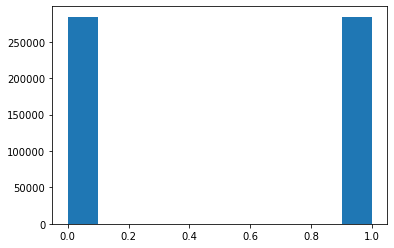

In [80]:
plt.hist(y)

Next lets standardize the data.  For this we are going to use StandardScaler that follows the below formula:

$$
  z = \frac{x-u}{s}
$$

where *u* will be the mean of the data and *s* will be the standard deviation of the data.  After standardizing the data, we will also split it into training and testing sets.

In [81]:
# Split the data set for training and testing after standardizing it
from sklearn.model_selection import train_test_split
ss = StandardScaler()
ss.fit(X)
ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

Now that we have generated synthetic data to make our dataset balanced, and we have cleaned/processed our data, lets create our Logistic Regression model.

# Logistic Regression

The logistic regression statistical model will model the probability of an event taking place by using the log odds for the event as a linear combination of independent variables as noted in https://en.wikipedia.org/wiki/Logistic_regression [3].  In our analysis we are using binary logistic regression since our data consists of two classes, 0 for not fraud, and 1 for fraud.  For this type of logistic regression model there is a single binary dependent variable which we have labeled in the data as 0 and 1 for our indicator variables while all of our other features are the independent variables and are continuous values.  Our features will give us a probabilistic outcome of belonging to either class 0 or 1 and since these values will vary between 0 or 1 the logistic regression model uses the logistic function to convert the log odds probability - hence the name of Logistic Regression [3].  

Further information and more detail on Logistic Regression can be found in [3], but let us now use this machine learning method on our fraud data. 

In [82]:
LR = LogisticRegression(max_iter=1000)

In [83]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [84]:
y_pred = LR.predict(X_test)

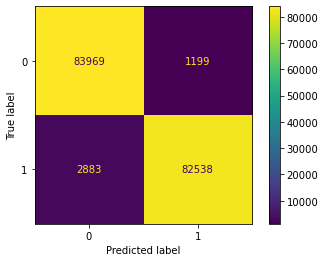

In [85]:
cm = confusion_matrix(y_test, y_pred, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()
plt.show()

In [86]:
accuracy_score(y_test, y_pred)

0.9760711417500543

# Analysis and Discussion

The overall accuracy of our model is 97% and from our confusion matrix we can see that we have 83969 for true positives, 1199 for false positives, 2883 for false negatives, and 82538 for true negatives.  

Our model performed well overall but there is still room for improvement.  In [2] the downside to using SMOTE is discussed which indicates this might not be the best way to create synthetic data for imbalanced datasets.  Another way to create synthetic data is from the use of Generative Adversarial Networks (GANs) which is something that we will be looking into in the future for an additional enhancement to this project.  This project was implemented to become more familiar with SMOTE and see how this method can enhance machine learning models when the dataset is heavily imbalanced. 

## References



[1] Credit Card Fraud Detection. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

[2] Mansourifar, Hadi & Shi, Weidong. (2020). Deep Synthetic Minority Over-Sampling Technique. 

[3] Wikipedia Contributors. (2019, April 12). Logistic regression. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Logistic_regression
